In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Data set

In [2]:
df = pd.read_csv('./datasets_13720_18513_insurance.csv')
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## First regression

In [5]:
X = df['age'].values
y = df['charges'].values

In [6]:
X = X.reshape(-1,1)

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2 ,random_state=100)

In [8]:
x_train.shape

(1070, 1)

In [9]:
x_test.shape

(268, 1)

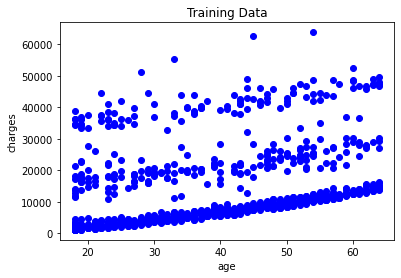

In [10]:
plt.scatter(x_train, y_train, color ='blue')
plt.xlabel('age')
plt.ylabel('charges')
plt.title('Training Data')
plt.show()

## First model

In [11]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [12]:
y_predict = model.predict(x_test)

In [13]:
y_test

array([ 1826.843   , 20177.67113 ,  7421.19455 ,  1877.9294  ,
       15518.18025 , 29523.1656  , 13143.86485 ,  3279.86855 ,
       18972.495   , 12950.0712  ,  8083.9198  , 18218.16139 ,
        8334.45755 ,  2727.3951  ,  7441.053   , 38711.      ,
       10338.9316  , 11552.904   ,  4751.07    , 11381.3254  ,
       10226.2842  ,  1526.312   ,  7222.78625 , 21259.37795 ,
       10848.1343  , 58571.07448 ,  3268.84665 , 48517.56315 ,
       21880.82    , 13457.9608  , 12592.5345  ,  2457.21115 ,
       47896.79135 , 33732.6867  ,  6600.361   , 14349.8544  ,
       18963.17192 , 39047.285   ,  3645.0894  , 30942.1918  ,
        7624.63    ,  7650.77375 ,  2498.4144  ,  4949.7587  ,
        2196.4732  ,  3972.9247  ,  4415.1588  ,  2362.22905 ,
       11272.33139 ,  5662.225   , 13405.3903  ,  8269.044   ,
        4915.05985 ,  7729.64575 ,  7045.499   , 11674.13    ,
       10085.846   , 37607.5277  ,  6313.759   , 20781.48892 ,
       24059.68019 ,  2741.948   , 18157.876   ,  8280.

In [14]:
y_predict

array([ 8616.25108097,  9995.73593914, 14410.08748527,  7788.56016607,
        7236.7662228 , 19652.12994631, 19100.33600304,  8064.4571377 ,
       11651.11776894, 19100.33600304, 15237.77840017,  9168.04502423,
       14961.88142854,  9168.04502423, 14685.98445691, 10823.42685404,
       17169.05720161, 15789.57234344, 11927.01474057, 18272.64508814,
       17444.95417324,  8064.4571377 , 14685.98445691, 13858.29354201,
       16341.36628671, 10823.42685404,  9995.73593914, 19100.33600304,
       14134.19051364, 19376.23297468, 16617.26325834,  7788.56016607,
       18548.54205978,  7236.7662228 , 13306.49959874, 19652.12994631,
       10547.5298824 , 12478.80868384, 10547.5298824 , 19100.33600304,
       14410.08748527, 13858.29354201,  9719.8389675 , 10823.42685404,
        7236.7662228 , 11099.32382567, 11651.11776894,  7788.56016607,
        7236.7662228 , 13030.60262711, 19652.12994631, 15513.67537181,
        7788.56016607, 13858.29354201, 13858.29354201, 17720.85114488,
      

In [15]:
new_age = np.array([4]).reshape(-1,1)
new_age

array([[4]])

In [16]:
model.predict(new_age)

array([3374.20861993])

In [17]:
new_age = np.array([20]).reshape(-1,1)
new_age

array([[20]])

In [18]:
model.predict(new_age)

array([7788.56016607])

In [19]:
model.score(x_train, y_train)*100

10.512919965622514

In [20]:
model.score(x_test, y_test)*100

2.3826712546764717

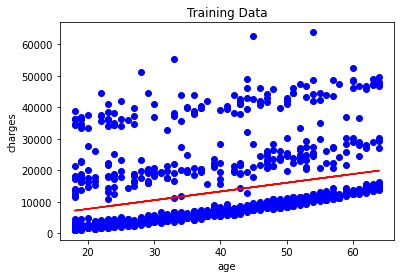

In [21]:
plt.scatter(x_train, y_train, color ='blue')
plt.plot(x_test, y_predict, color ='red')
plt.xlabel('age')
plt.ylabel('charges')
plt.title('Training Data')
plt.show()

<AxesSubplot:xlabel='age', ylabel='charges'>

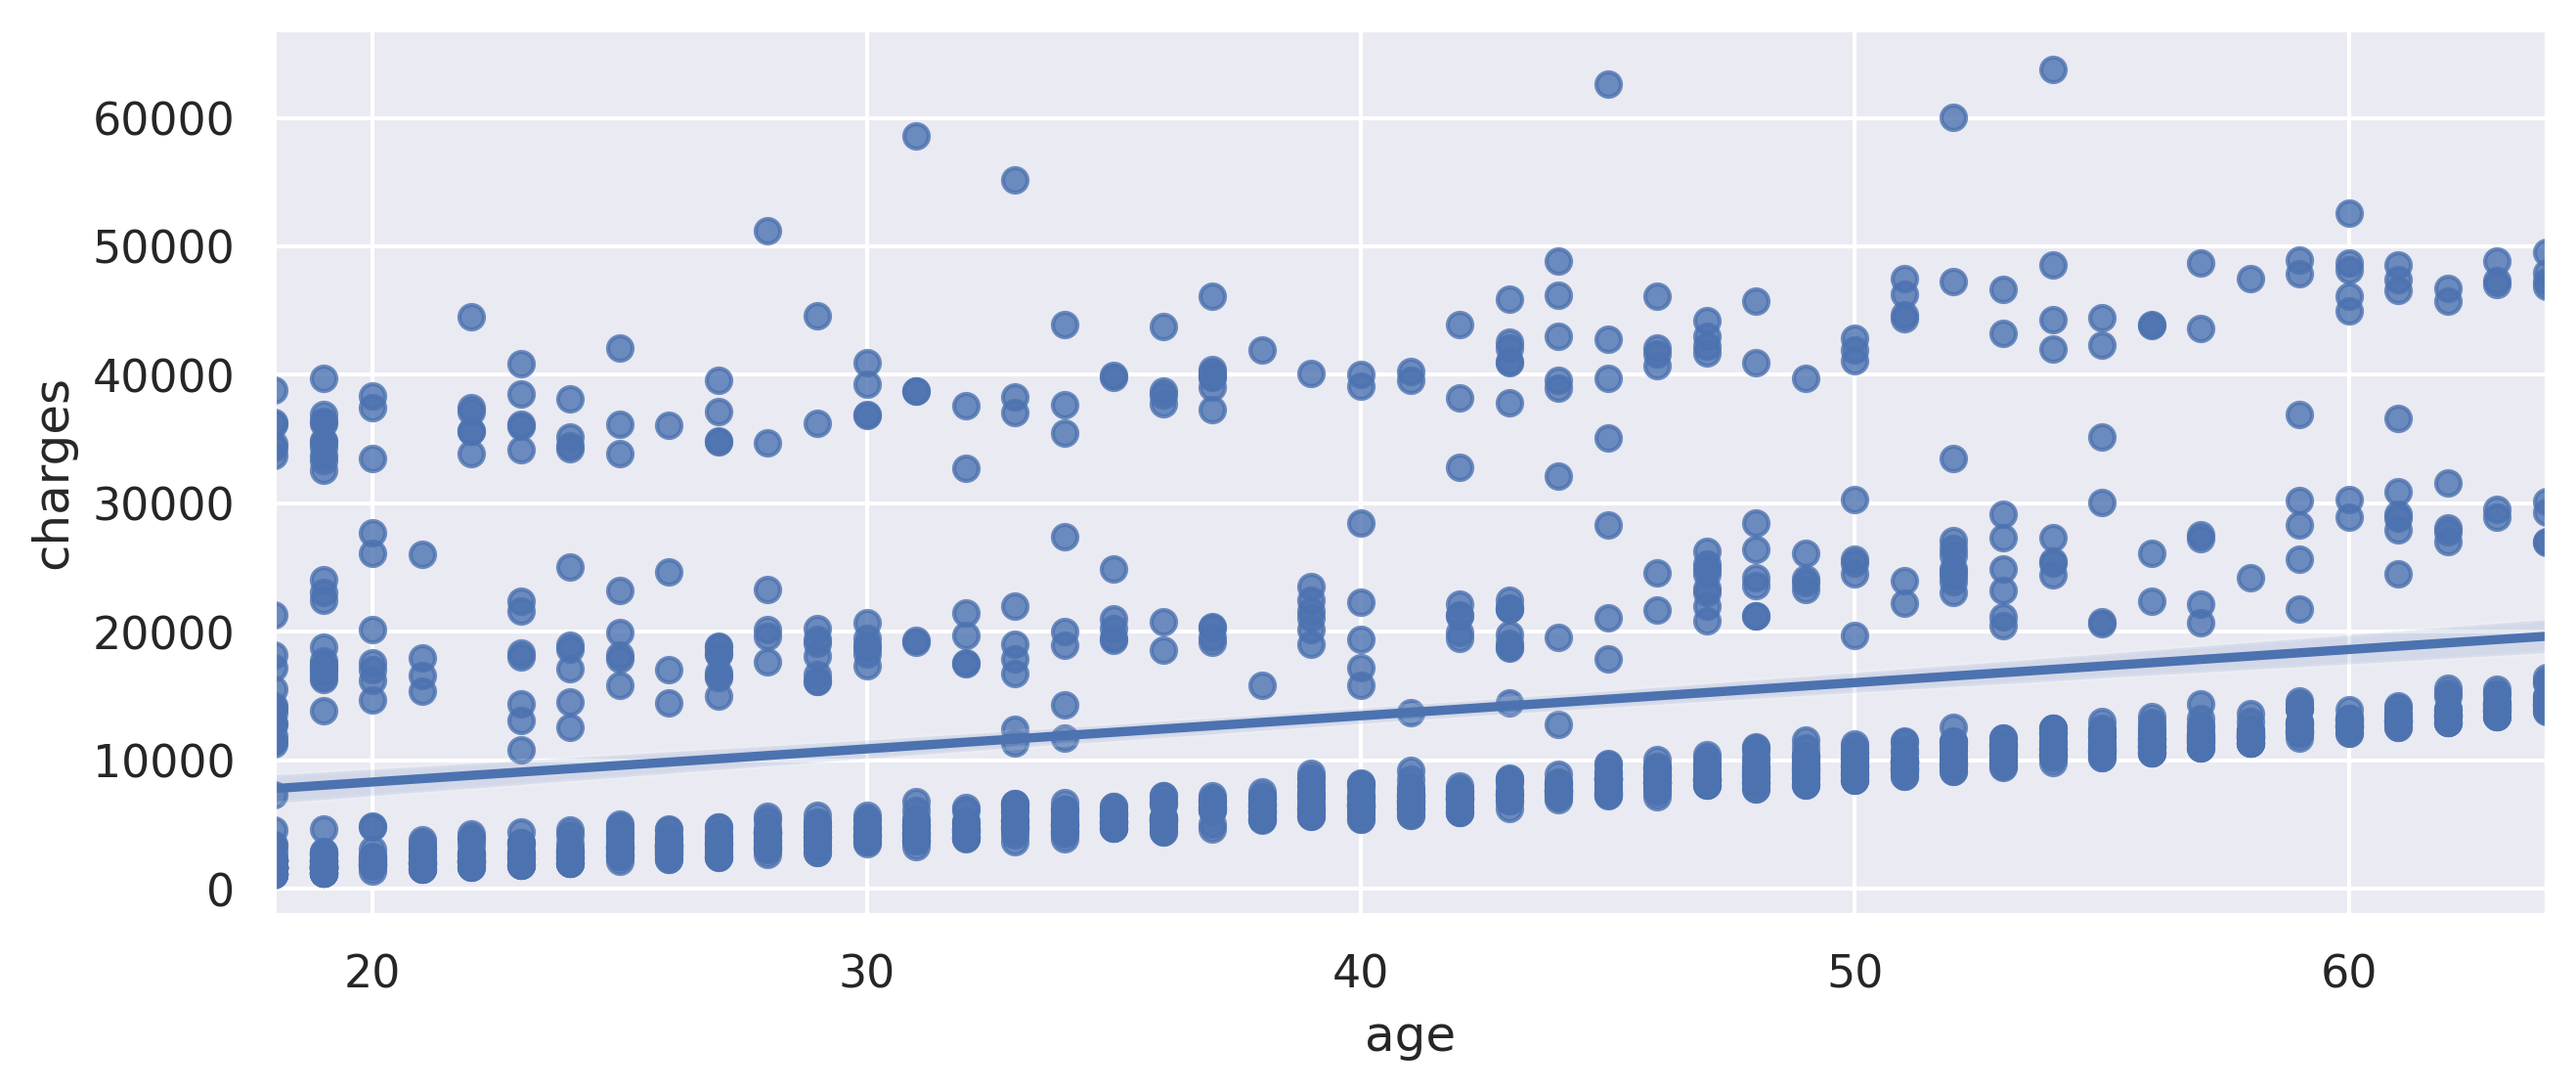

In [22]:
sns.set()
plt.figure(figsize = (10,4), dpi = 300)
sns.regplot(x = 'age', y = 'charges', data = df)

## Second regression


In [23]:
X = df['charges'].values
y = df['children'].values

In [24]:
X = X.reshape(-1,1)

In [25]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2 ,random_state=100)

In [26]:
x_train.shape

(1070, 1)

In [27]:
x_test.shape

(268, 1)

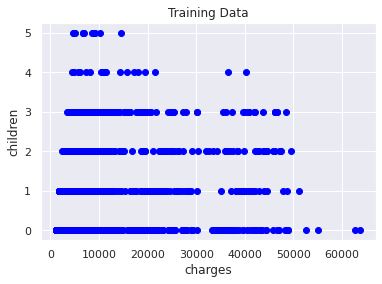

In [28]:
plt.scatter(x_train, y_train, color ='blue')
plt.xlabel('charges')
plt.ylabel('children')
plt.title('Training Data')
plt.show()

## Second model

In [29]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [30]:
y_predict = model.predict(x_test)

In [31]:
y_test

array([0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 1, 1, 1, 0, 1, 2, 0, 5, 1, 0, 0, 0,
       0, 2, 2, 1, 0, 1, 2, 0, 5, 0, 1, 0, 2, 1, 1, 1, 0, 3, 1, 1, 0, 2,
       0, 0, 0, 1, 1, 0, 0, 0, 5, 2, 1, 1, 1, 1, 2, 0, 2, 0, 2, 0, 3, 0,
       0, 1, 2, 0, 1, 1, 0, 2, 1, 0, 3, 3, 0, 3, 1, 0, 2, 1, 0, 0, 0, 2,
       0, 3, 0, 1, 0, 0, 0, 1, 2, 3, 5, 3, 5, 0, 3, 3, 0, 2, 0, 2, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 0, 5, 1, 2, 0, 3, 1, 0, 3, 0, 4, 2, 0, 2, 1,
       2, 0, 0, 1, 3, 0, 3, 1, 2, 0, 0, 1, 1, 0, 0, 1, 1, 3, 3, 0, 0, 1,
       0, 2, 3, 1, 3, 0, 3, 0, 2, 4, 1, 0, 0, 2, 2, 0, 1, 0, 1, 0, 4, 1,
       0, 3, 3, 0, 1, 1, 0, 4, 1, 0, 0, 1, 1, 0, 0, 1, 0, 3, 3, 3, 2, 2,
       1, 0, 0, 3, 0, 1, 1, 3, 0, 0, 0, 1, 1, 0, 0, 0, 2, 3, 2, 1, 0, 1,
       0, 0, 2, 1, 0, 2, 0, 0, 2, 0, 1, 2, 0, 3, 0, 0, 0, 3, 1, 0, 1, 0,
       2, 1, 1, 1, 0, 1, 5, 3, 1, 1, 0, 2, 2, 0, 0, 0, 0, 2, 1, 2, 3, 0,
       0, 0, 2, 0])

In [32]:
y_predict

array([1.00316053, 1.14297841, 1.04578478, 1.00354976, 1.10747701,
       1.21418323, 1.08938672, 1.01423136, 1.13379598, 1.08791018,
       1.05083419, 1.12804859, 1.05274308, 1.01002198, 1.04593609,
       1.2841868 , 1.06801549, 1.07726494, 1.02544068, 1.07595765,
       1.06715721, 1.00087073, 1.04427308, 1.15122011, 1.07189518,
       1.43550388, 1.01414738, 1.35890457, 1.15595498, 1.09177987,
       1.08518605, 1.0079634 , 1.35417481, 1.24625624, 1.03953072,
       1.09857535, 1.13372495, 1.28674901, 1.01701403, 1.22499501,
       1.04733479, 1.04753398, 1.00827734, 1.02695452, 1.0059768 ,
       1.01951186, 1.02288132, 1.00723972, 1.07512721, 1.03238291,
       1.09137932, 1.05224468, 1.02669014, 1.04813492, 1.0429223 ,
       1.07818858, 1.06608719, 1.27577927, 1.03734705, 1.147579  ,
       1.17255606, 1.01013286, 1.12758927, 1.0523329 , 1.08057366,
       1.00973792, 1.00598988, 1.02921199, 1.02494786, 1.33868059,
       1.06437424, 1.03003507, 1.08796387, 1.12152358, 1.05647

In [33]:
new_charges = np.array([10]).reshape(-1,1)
new_charges

array([[10]])

In [34]:
model.predict(new_charges)

array([0.98931771])

In [35]:
new_charges = np.array([50]).reshape(-1,1)
new_charges

array([[50]])

In [36]:
model.predict(new_charges)

array([0.98962248])

In [37]:
model.score(x_train, y_train)*100

0.5895901331189224

In [38]:
model.score(x_test, y_test)*100

-0.07393879704613582

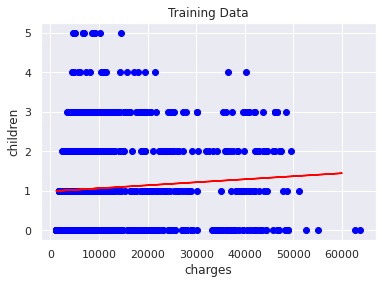

In [39]:
plt.scatter(x_train, y_train, color ='blue')
plt.plot(x_test, y_predict, color ='red')
plt.xlabel('charges')
plt.ylabel('children')
plt.title('Training Data')
plt.show()

<AxesSubplot:xlabel='charges', ylabel='children'>

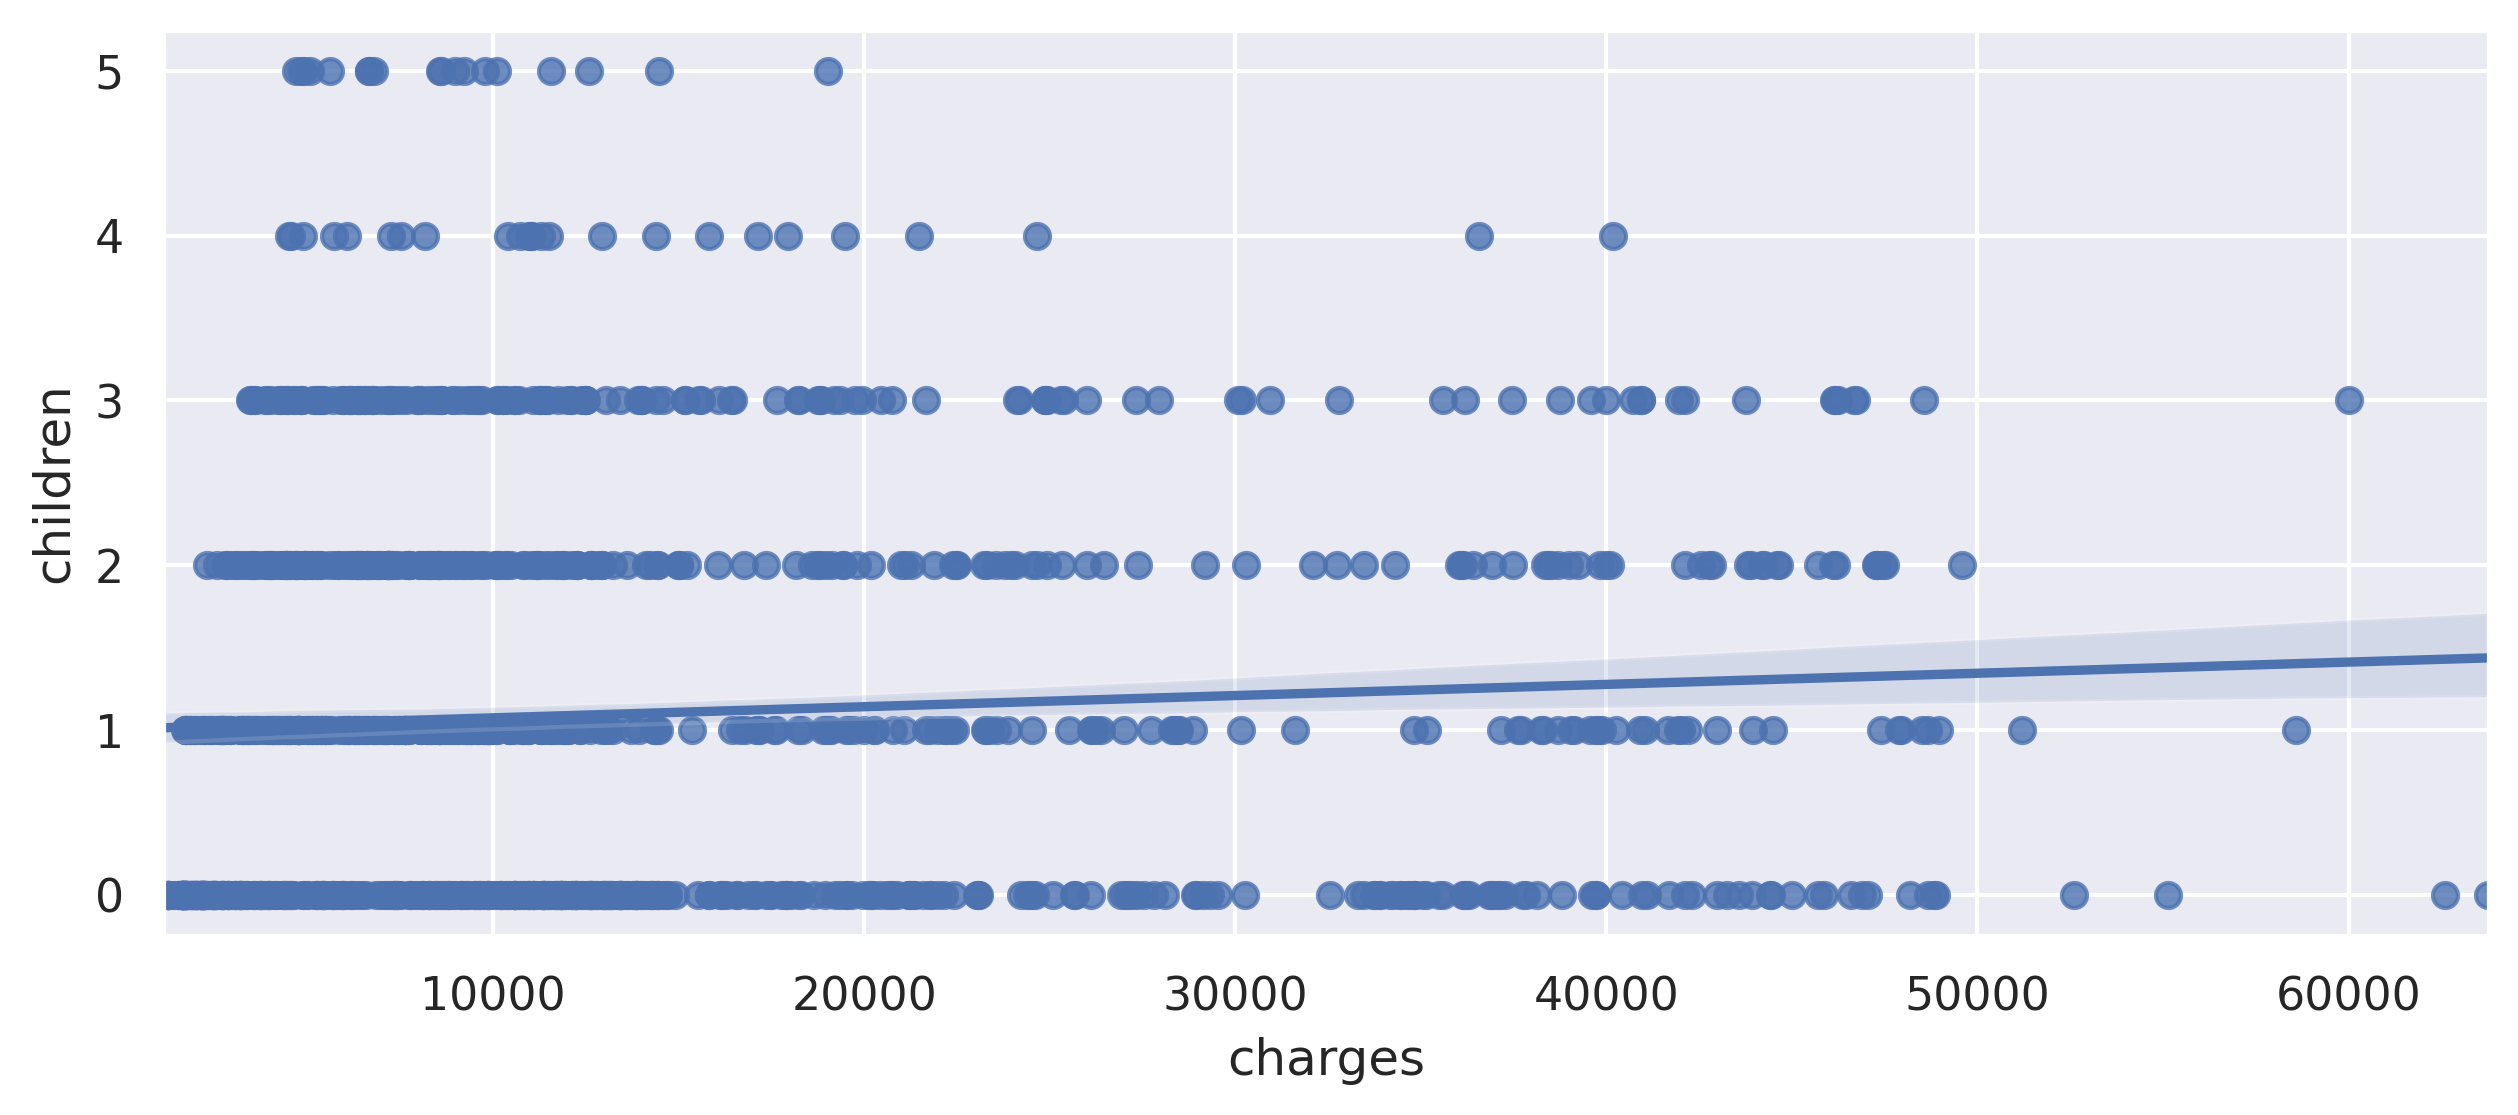

In [40]:
sns.set()
plt.figure(figsize = (10,4), dpi = 300)
sns.regplot(x = 'charges', y = 'children', data = df)

## Third regression


In [41]:
X = df['age'].values
y = df['bmi'].values

In [42]:
X = X.reshape(-1,1)

In [43]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2 ,random_state=100)

In [44]:
x_train.shape

(1070, 1)

In [45]:
x_test.shape

(268, 1)

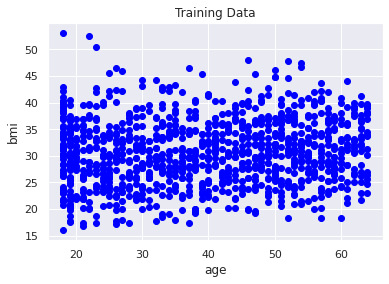

In [46]:
plt.scatter(x_train, y_train, color ='blue')
plt.xlabel('age')
plt.ylabel('bmi')
plt.title('Training Data')
plt.show()

## Third model


In [47]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [48]:
y_predict = model.predict(x_test)

In [49]:
y_test

array([34.4  , 27.5  , 27.645, 31.46 , 25.175, 27.74 , 33.915, 25.745,
       25.3  , 38.38 , 47.52 , 32.23 , 33.345, 30.59 , 30.2  , 36.3  ,
       31.24 , 31.9  , 30.5  , 49.06 , 38.28 , 31.1  , 21.375, 24.605,
       36.67 , 38.095, 35.435, 36.385, 24.7  , 29.92 , 46.75 , 28.785,
       36.765, 31.73 , 29.9  , 21.66 , 38.83 , 34.2  , 25.46 , 29.92 ,
       25.8  , 41.325, 33.66 , 36.63 , 25.08 , 28.93 , 27.72 , 32.395,
       28.31 , 41.8  , 41.47 , 22.8  , 30.115, 26.125, 25.3  , 35.8  ,
       36.1  , 33.63 , 30.8  , 33.   , 30.59 , 30.4  , 29.735, 31.13 ,
       33.88 , 28.12 , 26.315, 34.8  , 46.53 , 46.2  , 25.8  , 22.135,
       21.4  , 22.99 , 33.725, 25.46 , 26.4  , 25.85 , 30.02 , 25.7  ,
       28.31 , 36.19 , 26.315, 29.48 , 22.895, 32.45 , 28.9  , 32.775,
       24.795, 37.145, 27.06 , 28.05 , 18.05 , 27.6  , 30.78 , 28.8  ,
       38.17 , 38.   , 18.3  , 18.905, 24.3  , 36.   , 30.78 , 20.35 ,
       44.88 , 33.82 , 35.6  , 20.045, 43.4  , 32.01 , 31.73 , 24.605,
      

In [50]:
y_predict

array([29.92841062, 30.16812129, 30.93519543, 29.78458421, 29.68869995,
       31.84609598, 31.75021171, 29.83252635, 30.45577409, 31.75021171,
       31.07902184, 30.02429489, 31.0310797 , 30.02429489, 30.98313757,
       30.31194769, 31.41461677, 31.1749061 , 30.50371623, 31.60638531,
       31.46255891, 29.83252635, 30.98313757, 30.83931117, 31.27079037,
       30.31194769, 30.16812129, 31.75021171, 30.8872533 , 31.79815385,
       31.31873251, 29.78458421, 31.65432745, 29.68869995, 30.7434269 ,
       31.84609598, 30.26400556, 30.59960049, 30.26400556, 31.75021171,
       30.93519543, 30.83931117, 30.12017915, 30.31194769, 29.68869995,
       30.35988982, 30.45577409, 29.78458421, 29.68869995, 30.69548476,
       31.84609598, 31.12696397, 29.78458421, 30.83931117, 30.83931117,
       31.51050104, 31.36667464, 30.35988982, 30.59960049, 31.46255891,
       29.73664208, 29.88046848, 30.21606342, 31.12696397, 31.46255891,
       29.92841062, 29.68869995, 30.50371623, 30.35988982, 30.88

In [51]:
new_age = np.array([15]).reshape(-1,1)
new_age

array([[15]])

In [52]:
model.predict(new_age)

array([29.54487354])

In [53]:
new_age = np.array([30]).reshape(-1,1)
new_age

array([[30]])

In [54]:
model.predict(new_age)

array([30.26400556])

In [55]:
model.score(x_train, y_train)*100

1.2028150601788634

In [56]:
model.score(x_test, y_test)*100

1.044440656600687

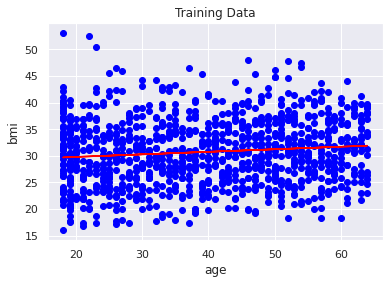

In [57]:
plt.scatter(x_train, y_train, color ='blue')
plt.plot(x_test, y_predict, color ='red')
plt.xlabel('age')
plt.ylabel('bmi')
plt.title('Training Data')
plt.show()

<AxesSubplot:xlabel='age', ylabel='bmi'>

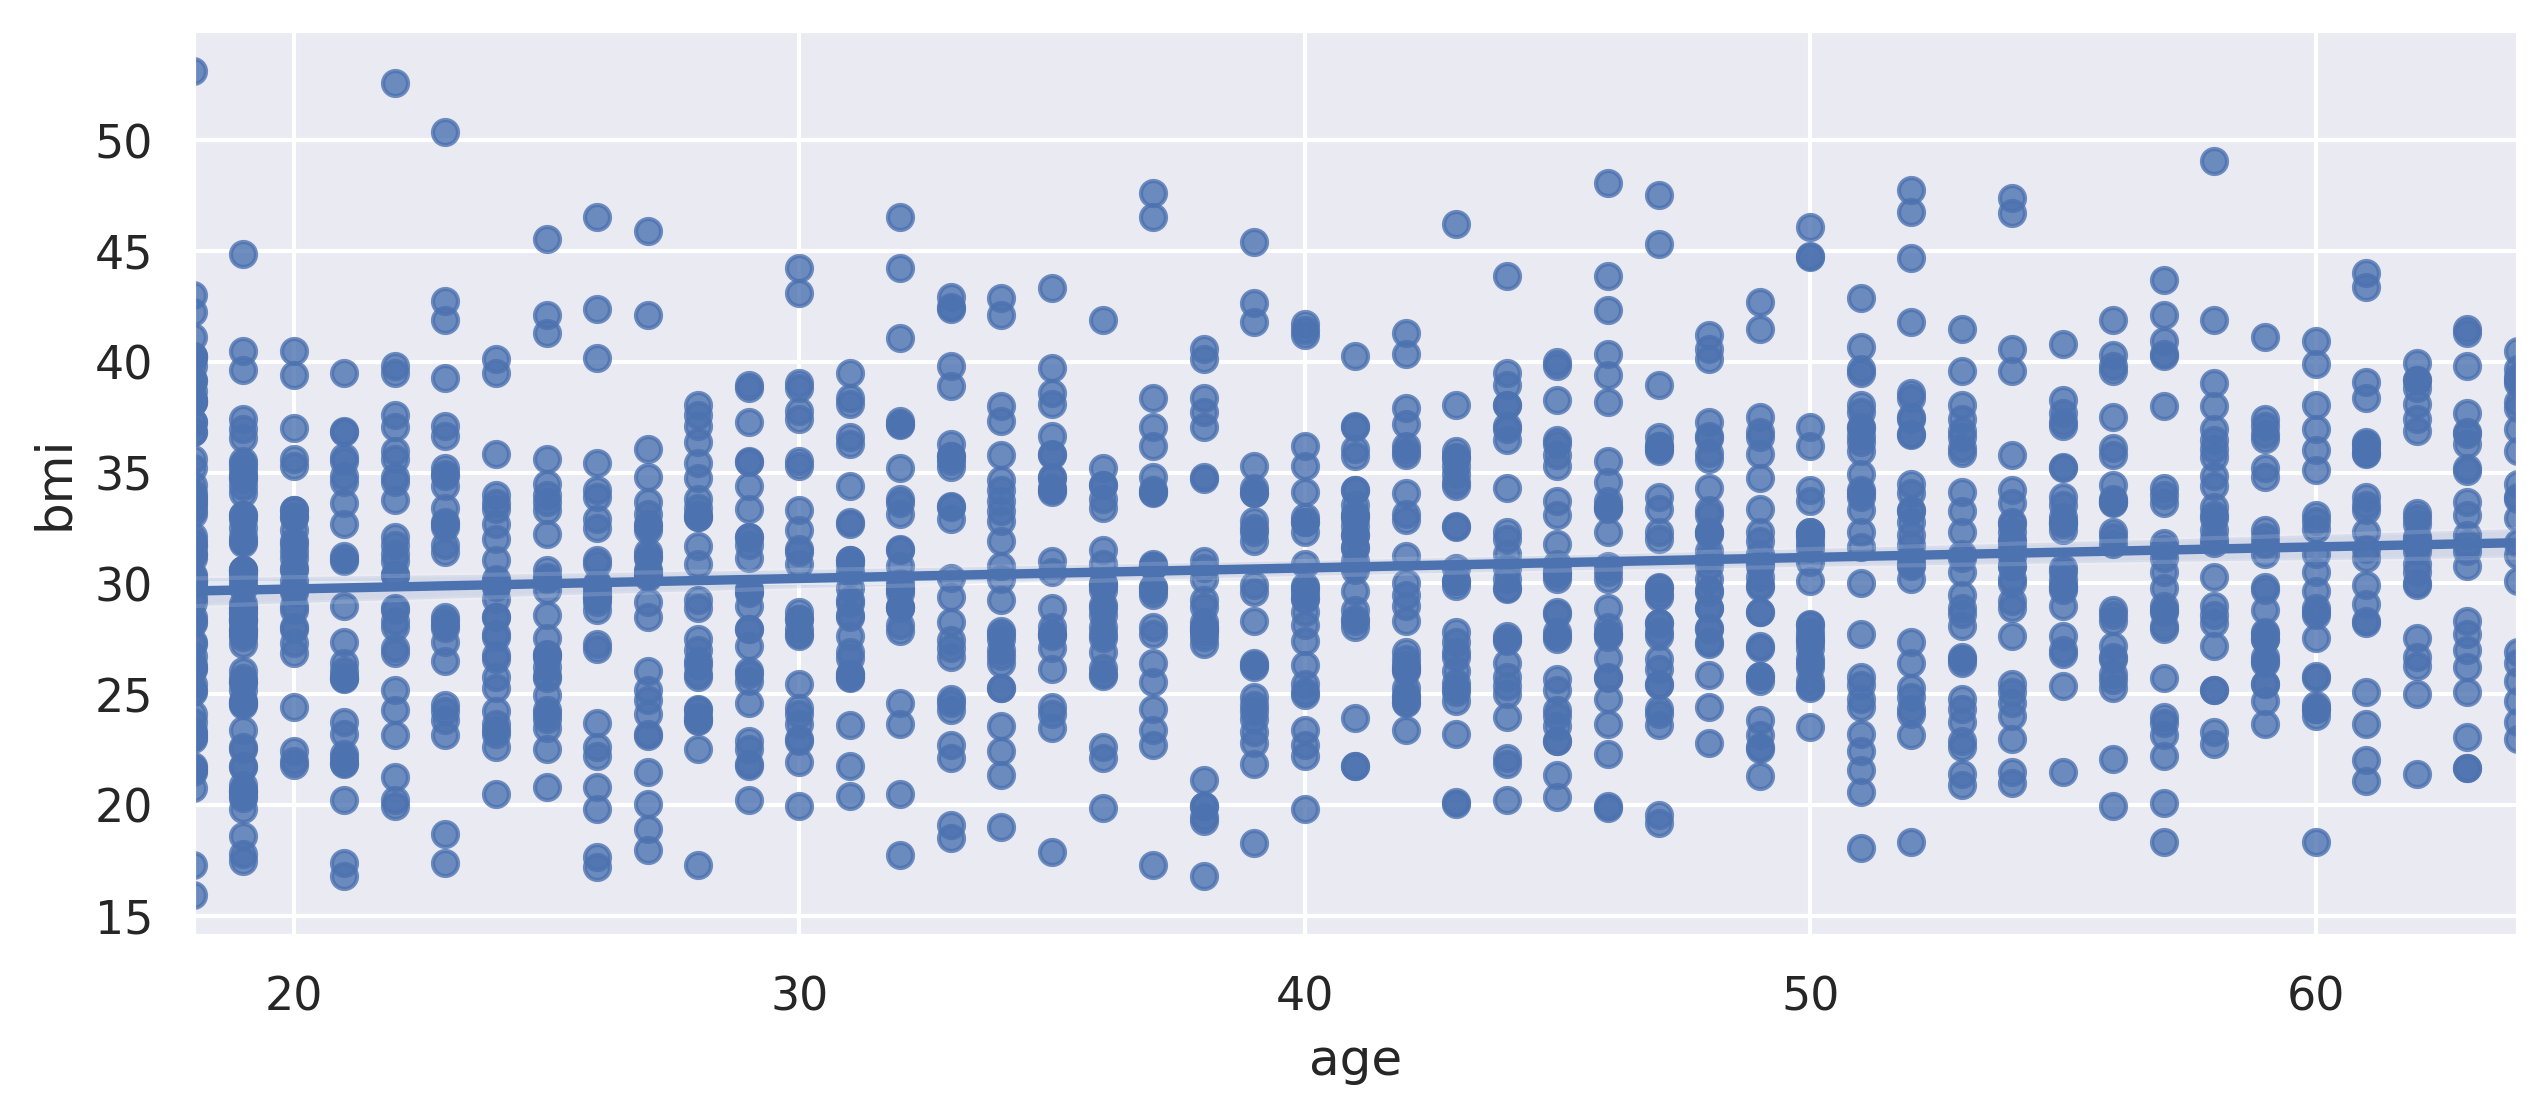

In [58]:
sns.set()
plt.figure(figsize = (10,4), dpi = 300)
sns.regplot(x = 'age', y = 'bmi', data = df)

### What I learned
- How to anlays data by using 
    - pandas
    - seaborn
    - matplotlib
    - numpy